In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
from ngboost import NGBRegressor
from ngboost.distns import Normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [2]:
!pip install pytorch-tabnet

In [5]:
df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Exploratory Data Analysis(EDA)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

<Axes: >

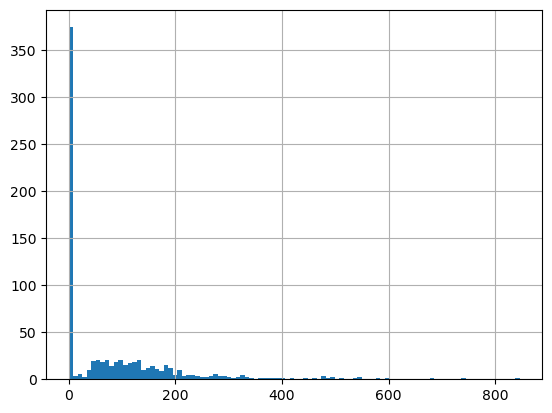

In [11]:
df["Insulin"].hist(bins=100)

In [13]:
basic_info = df.describe().T
basic_info

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualization

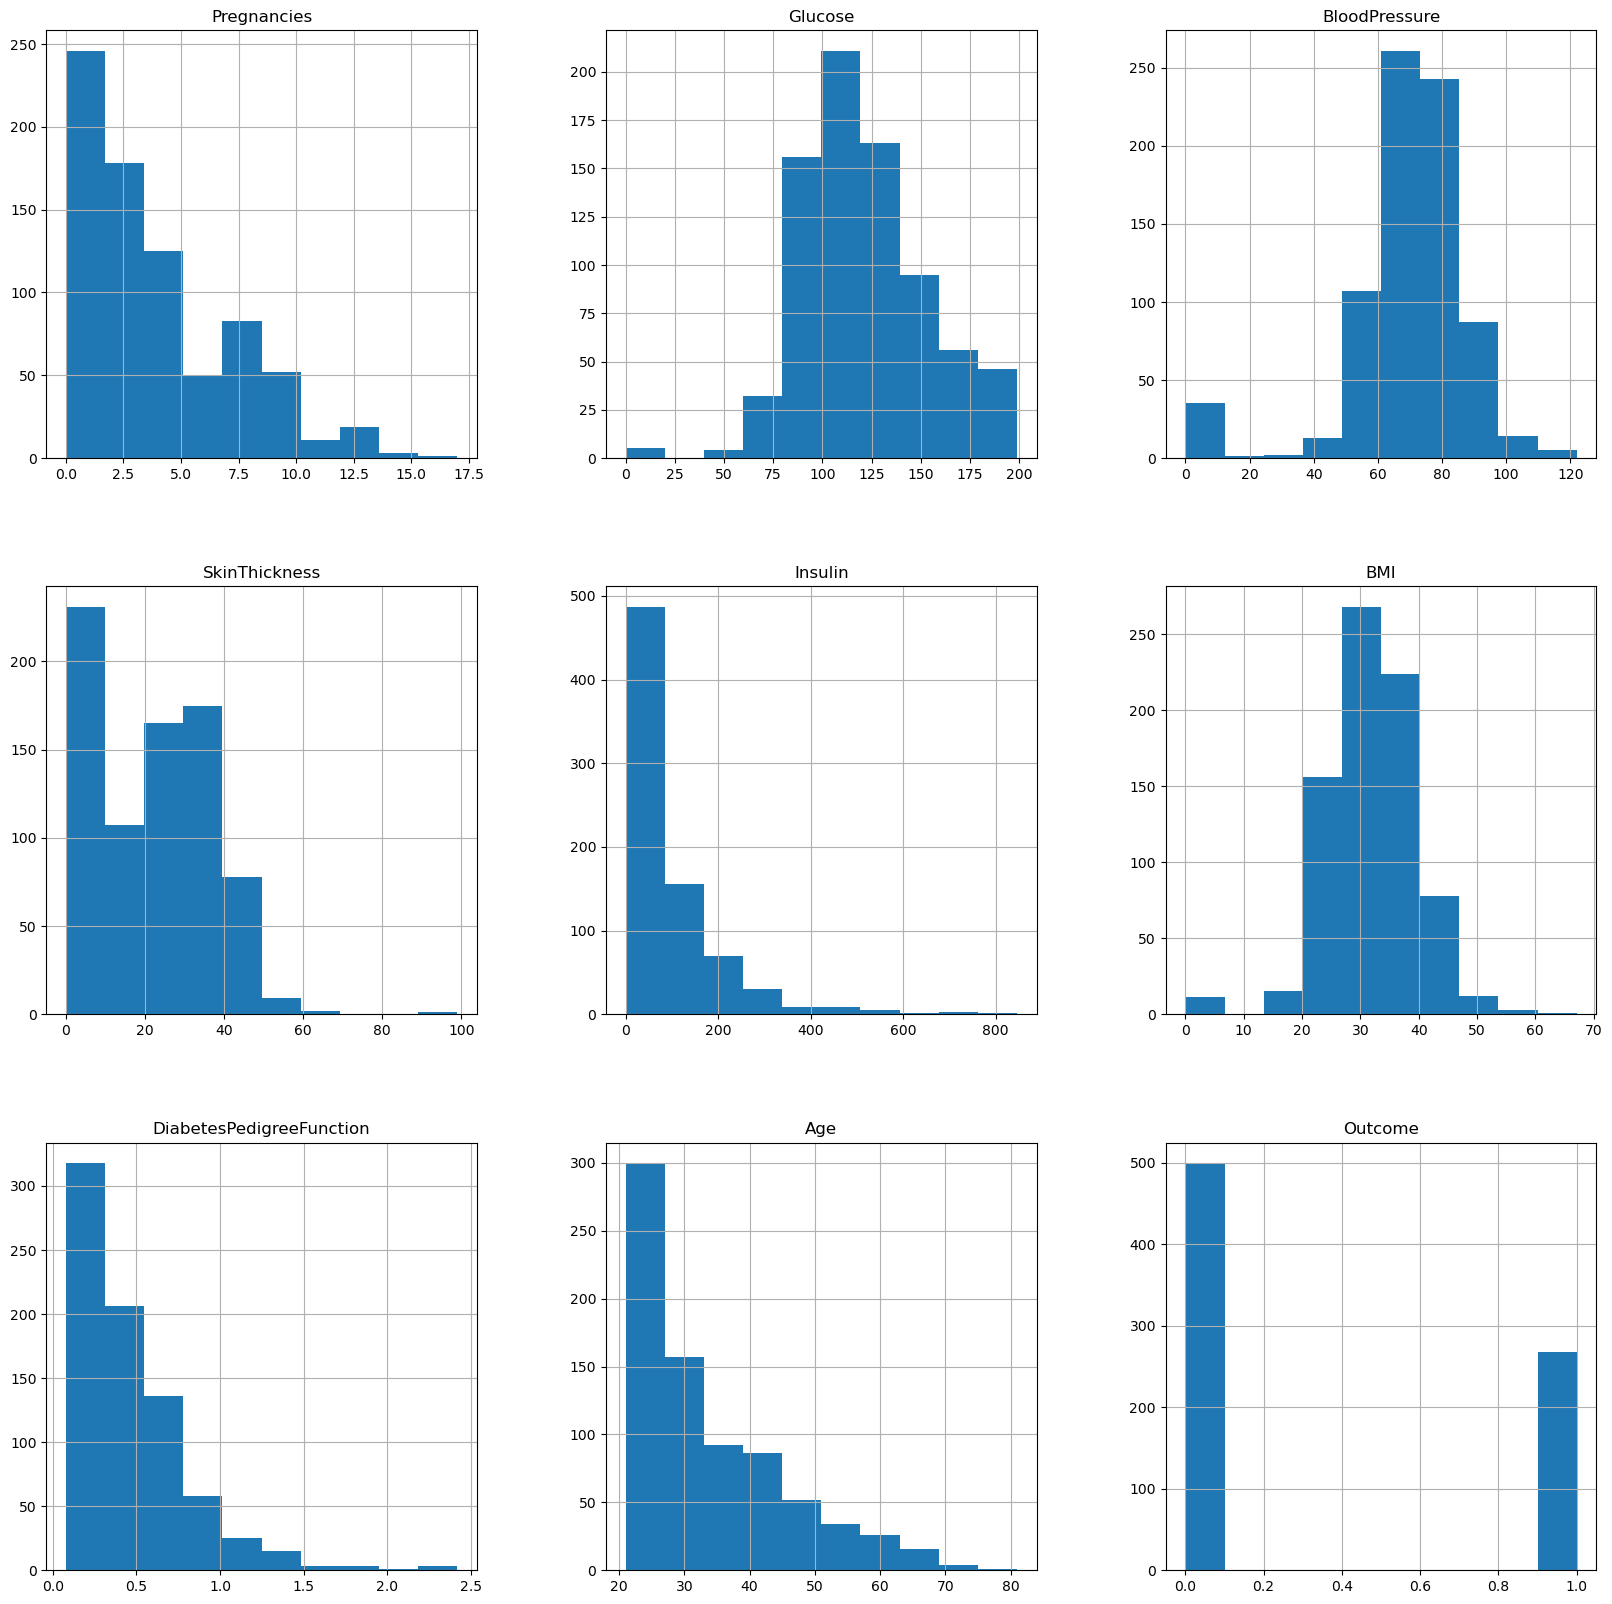

In [17]:
p = df.hist(figsize = (20,20))

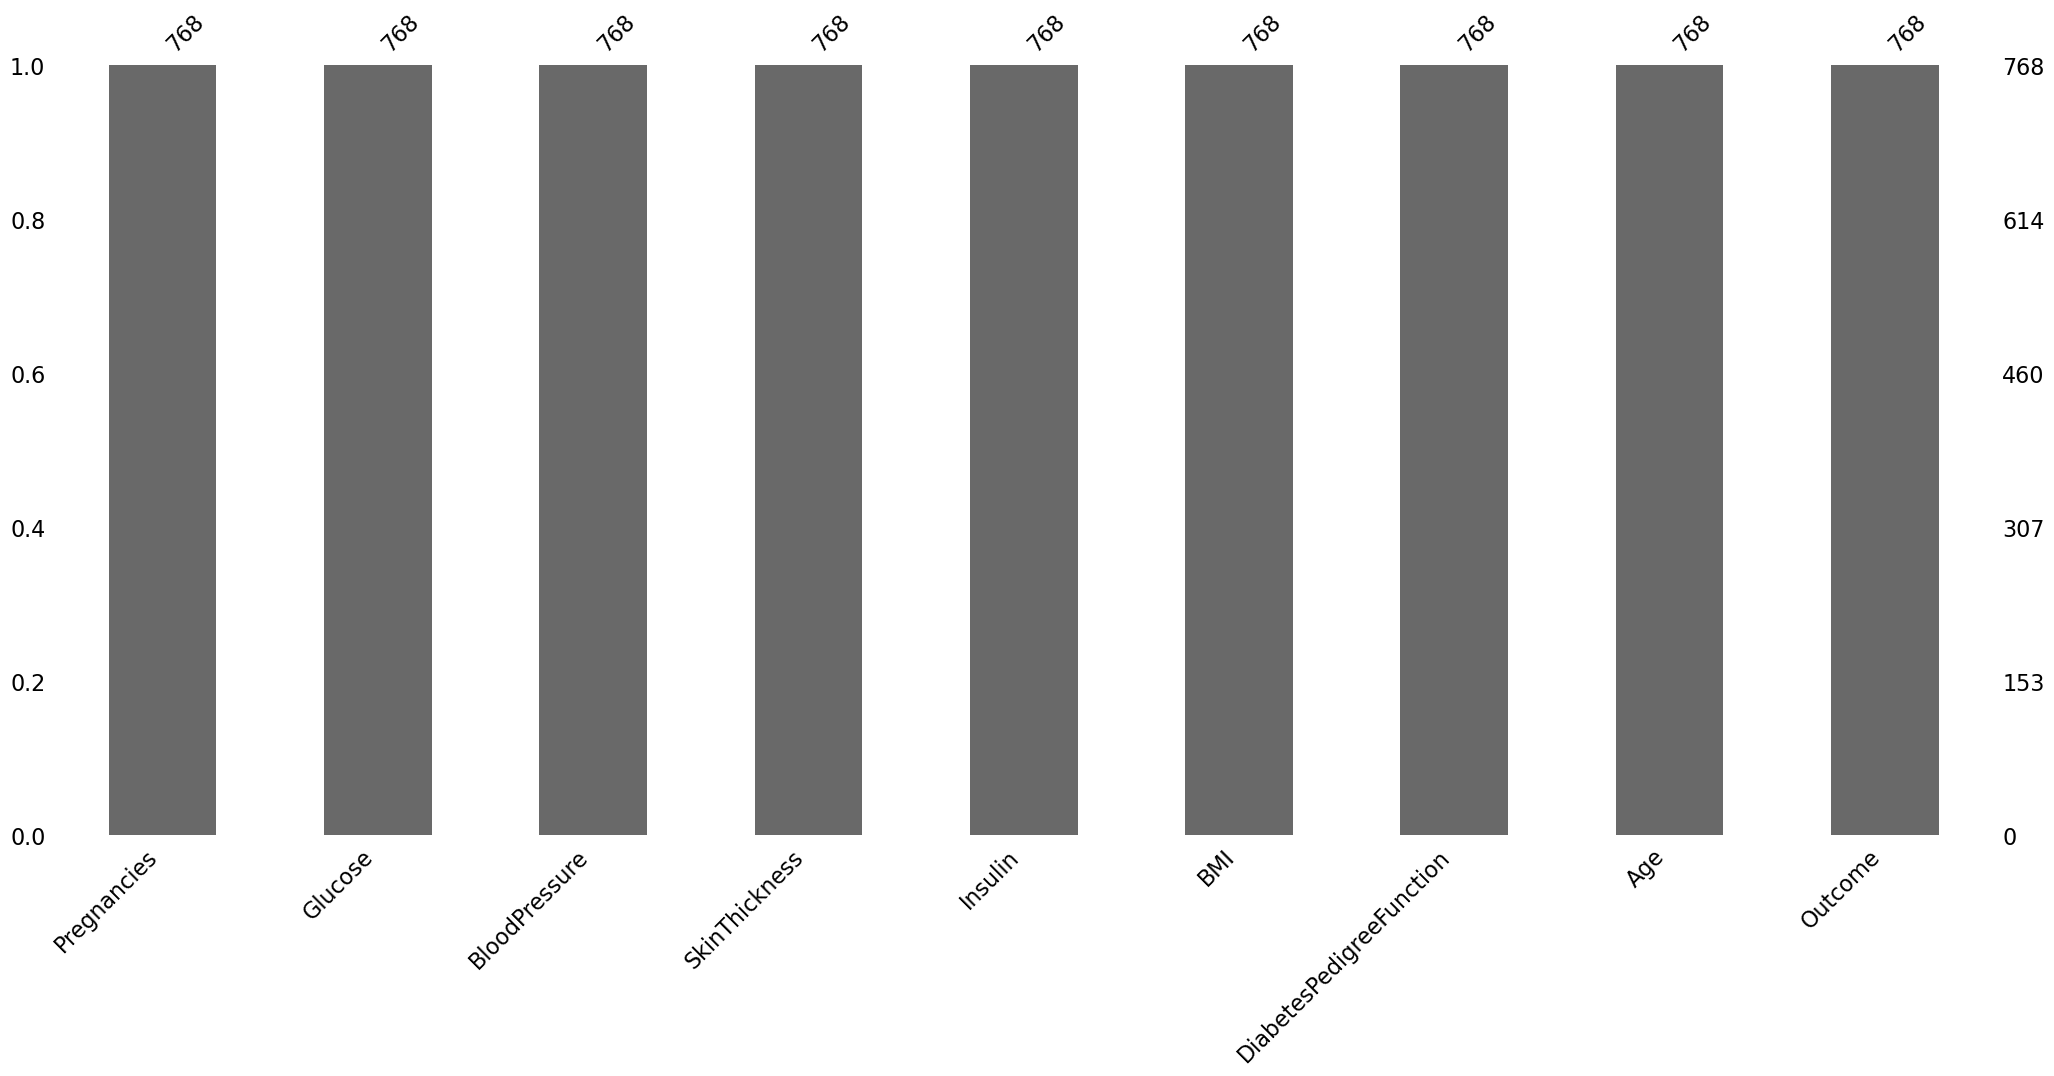

In [19]:
p=msno.bar(df)

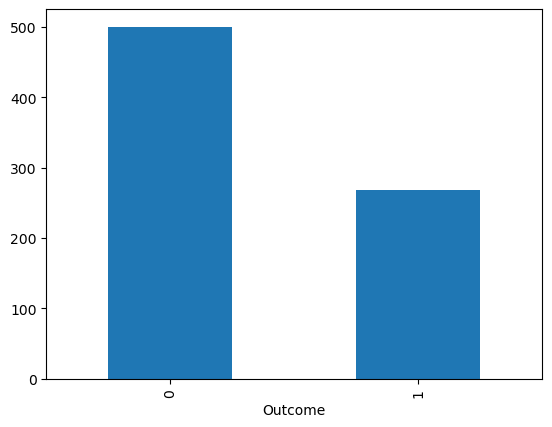

In [21]:
p=df['Outcome'].value_counts().plot(kind="bar")

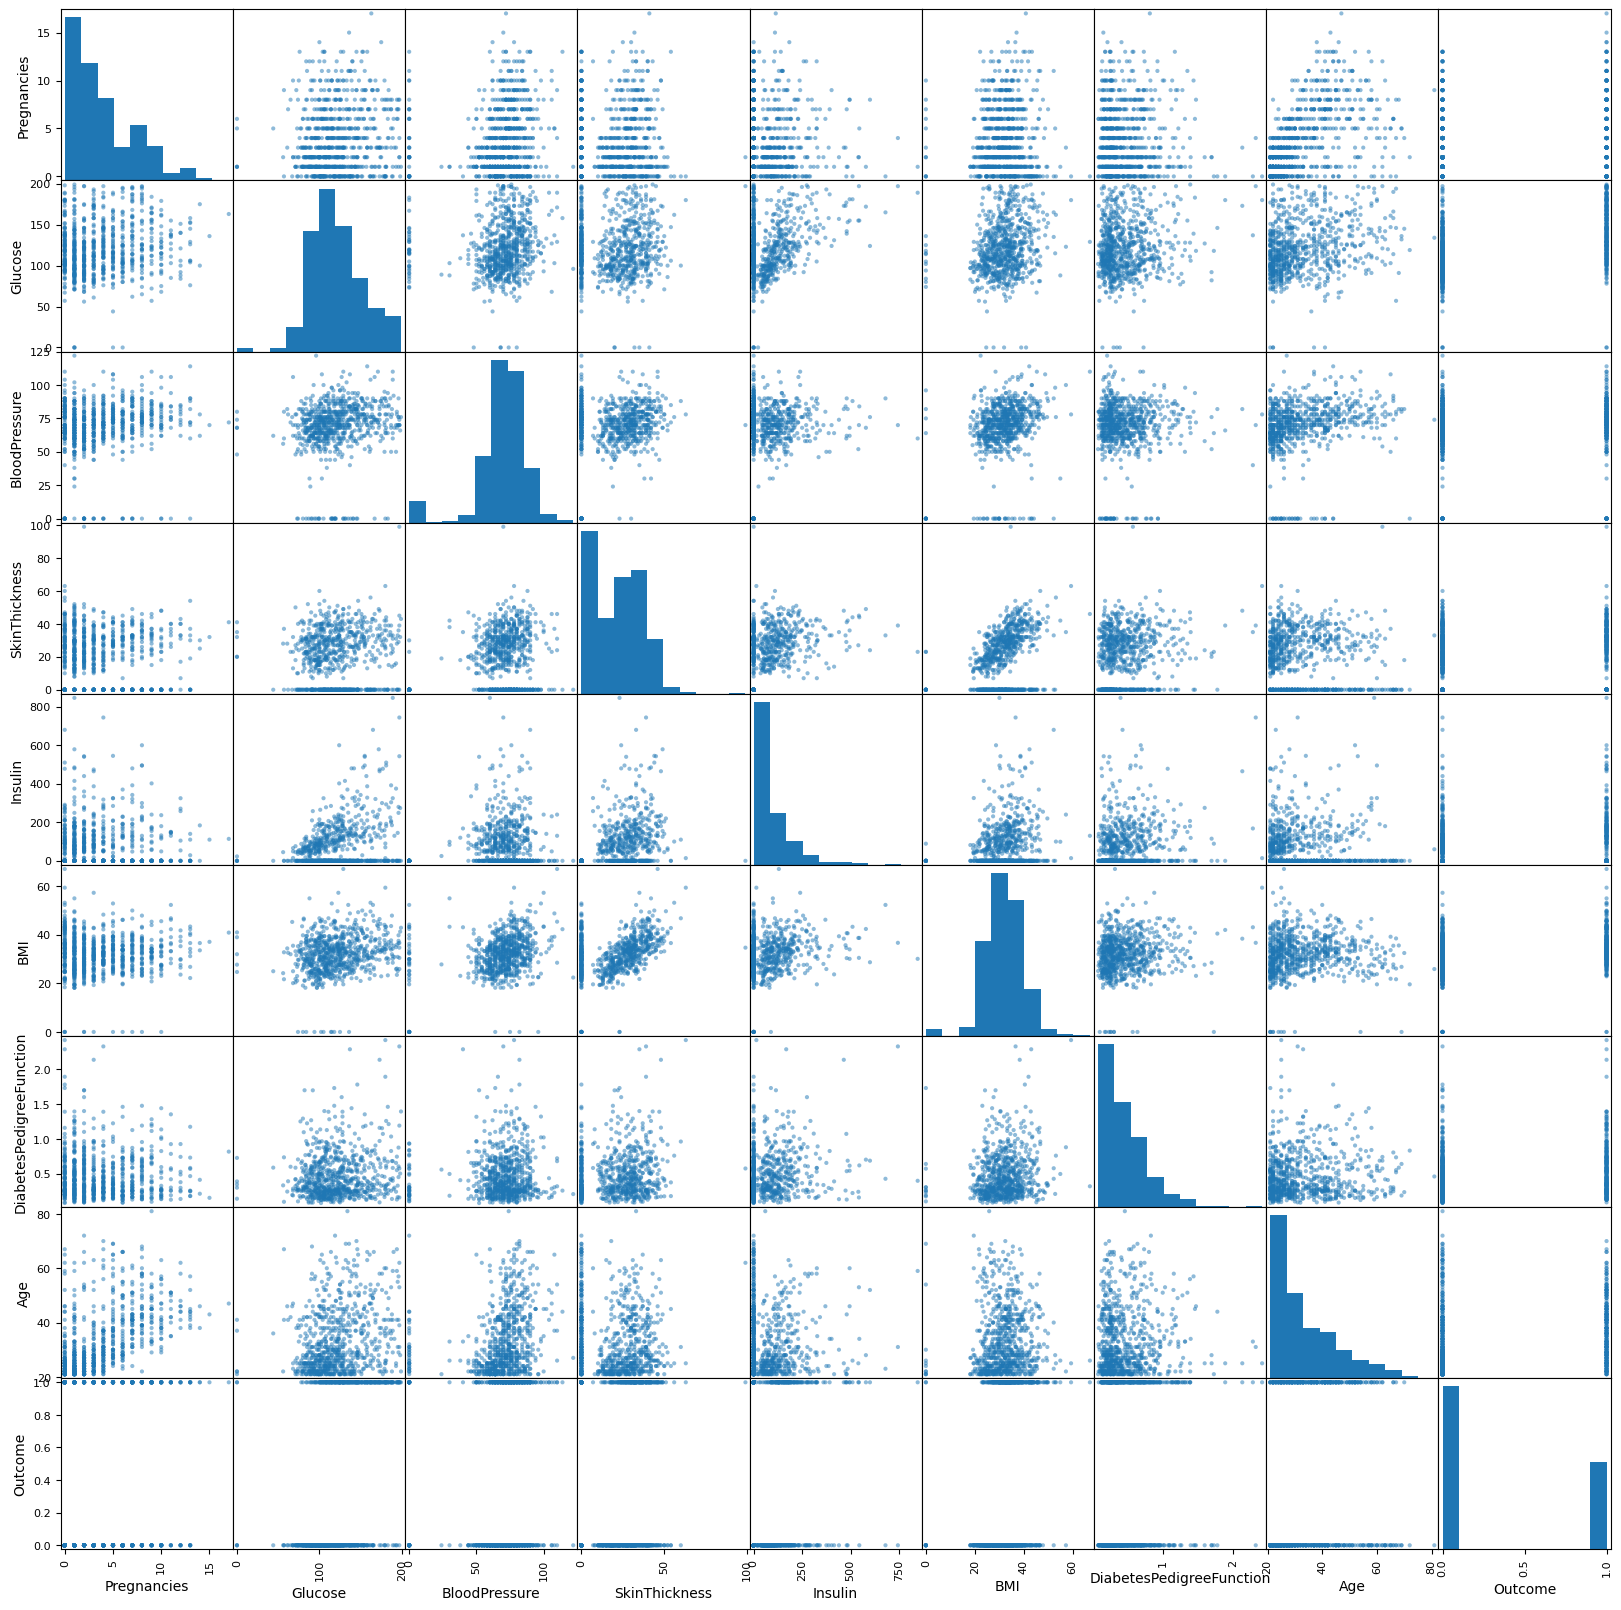

In [23]:
p = scatter_matrix(df,figsize=(20,20))

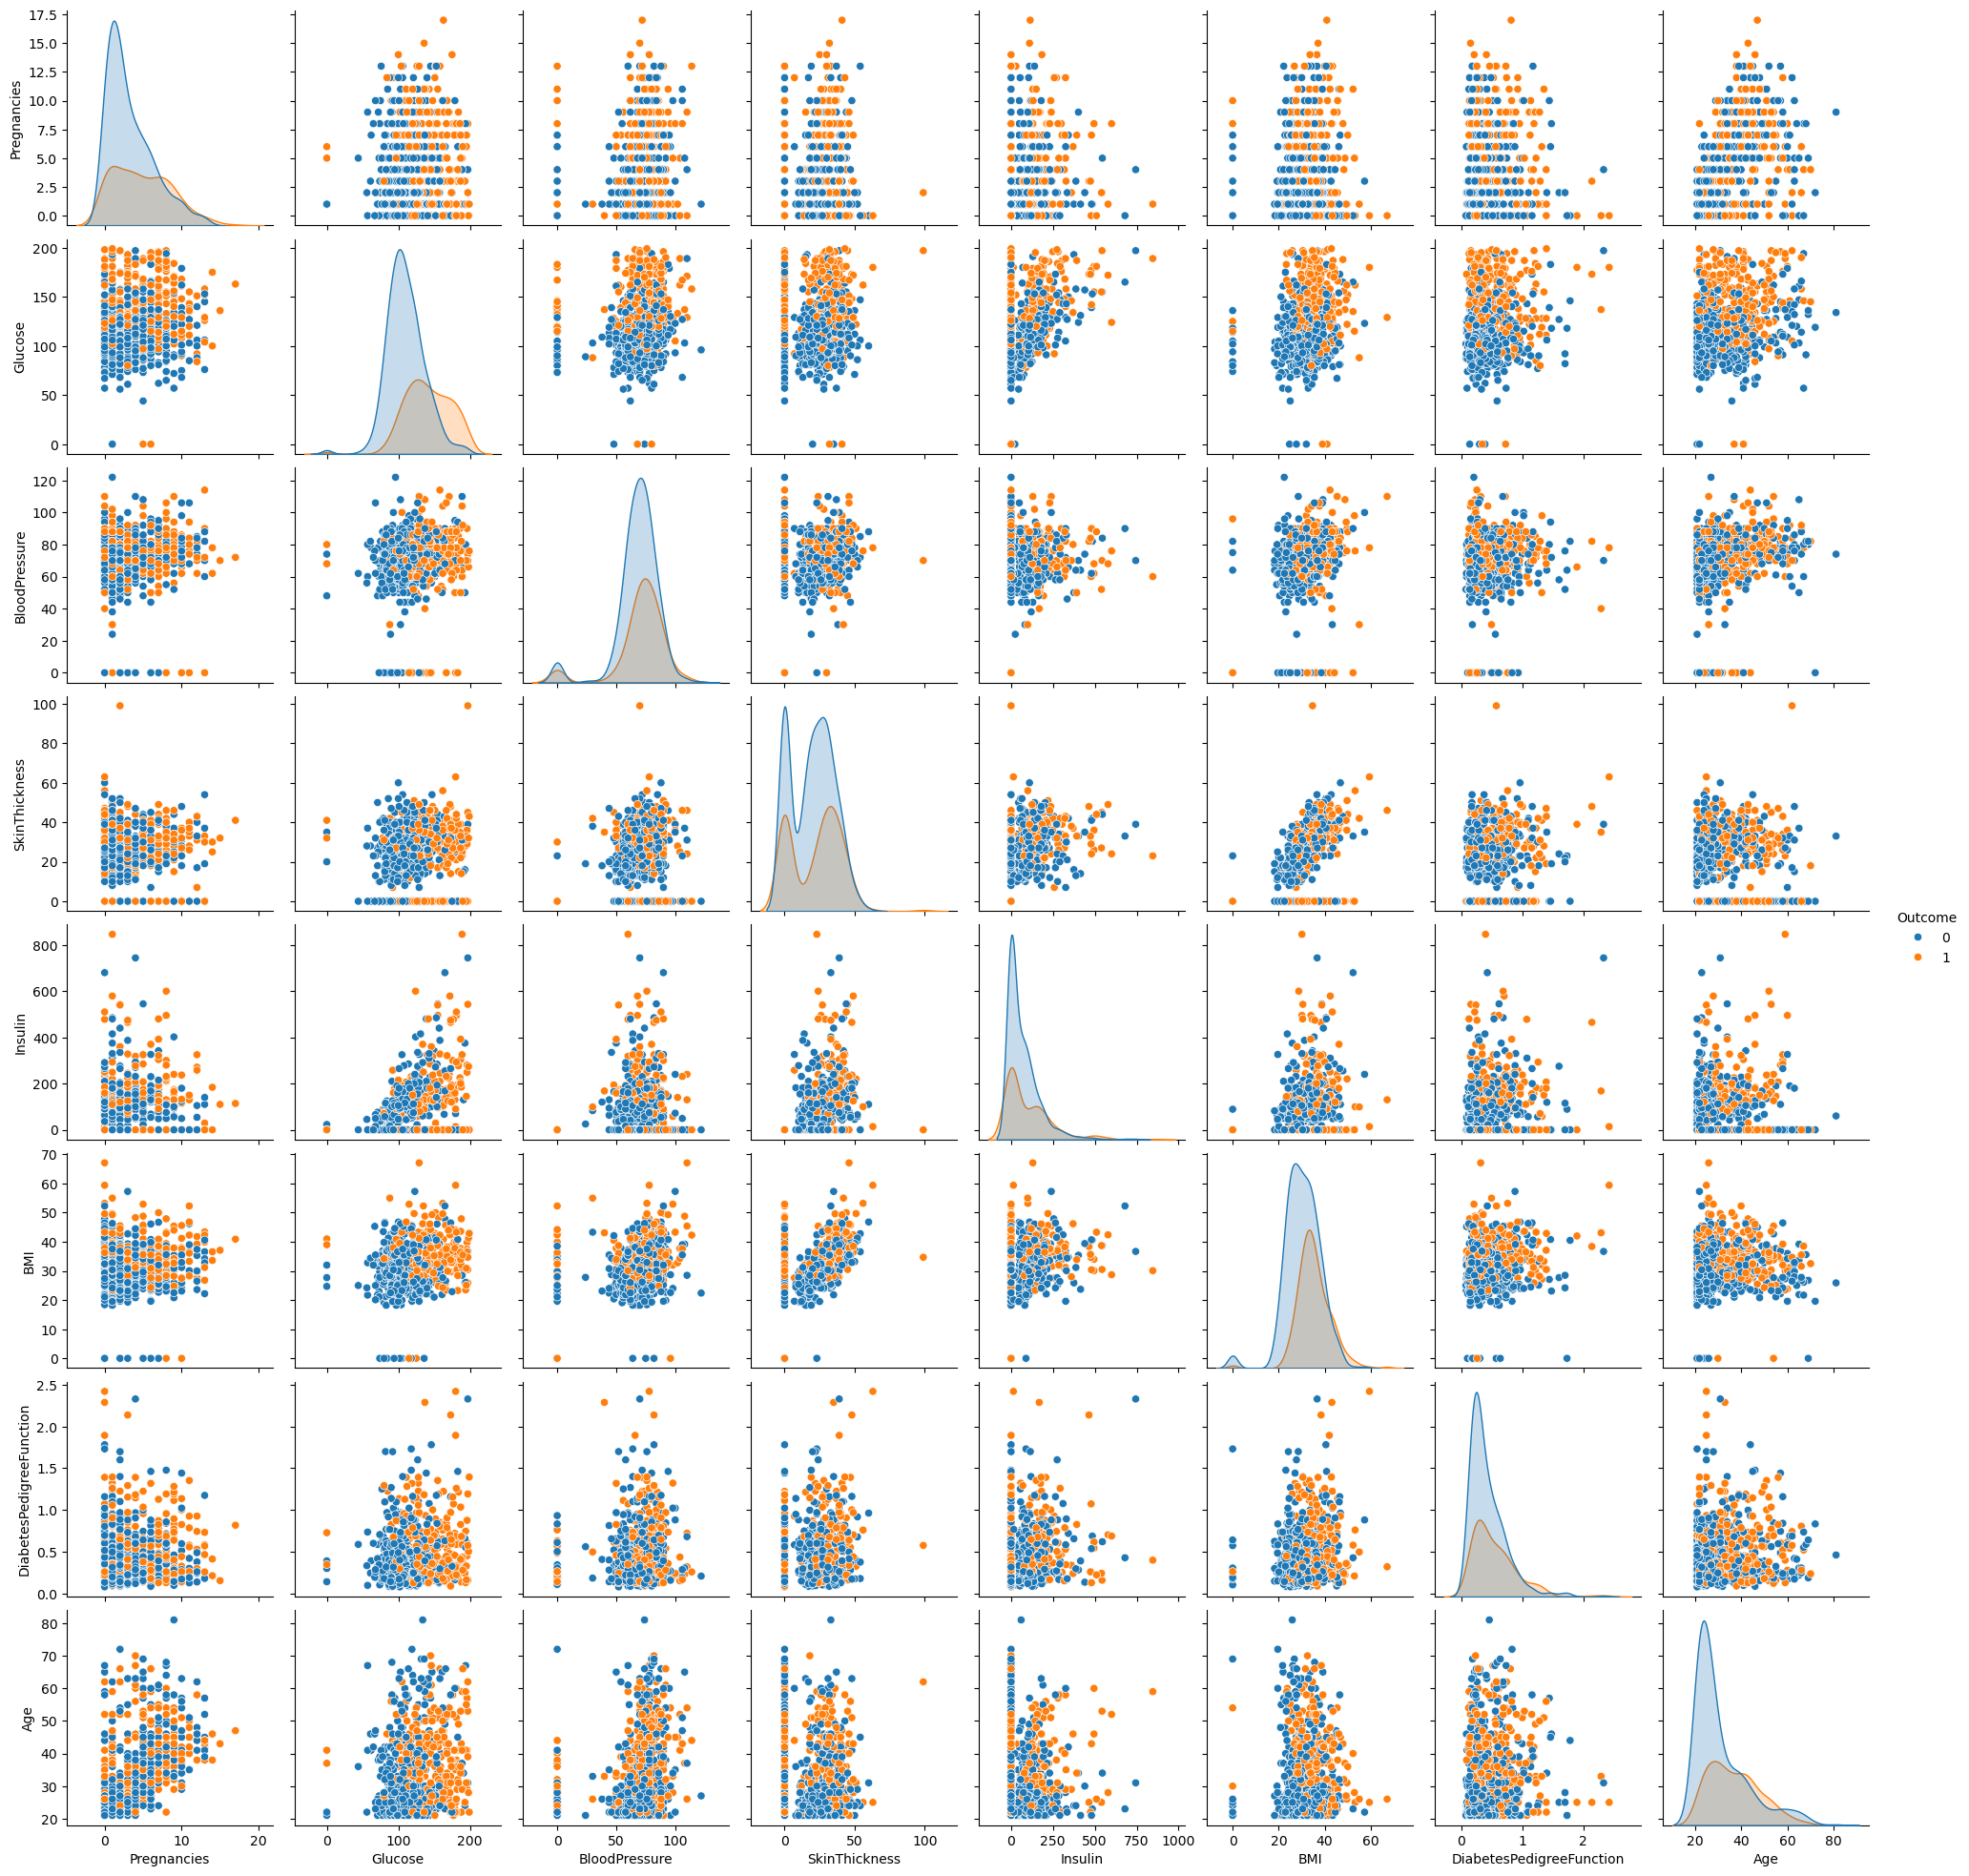

In [25]:
p = sns.pairplot(df,hue='Outcome')

Correlation between all the features

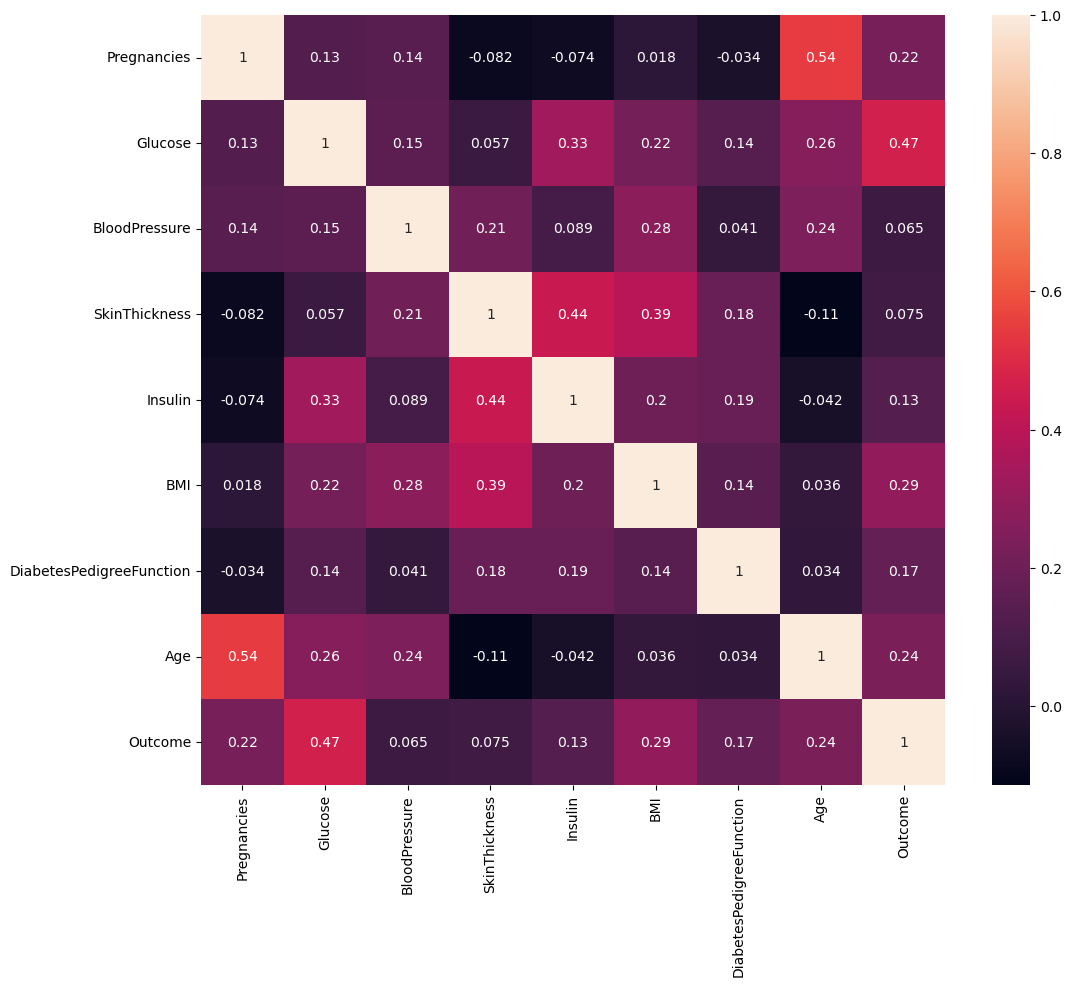

In [27]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(),annot=True)

In [29]:
df["Glucose"] = df["Glucose"].replace(0, np.nan)

num_missing = df["Glucose"].isna().sum()
num_missing

5

Iter 1 R2 Score: 0.017 - Labeled Size: 50
Iter 2 R2 Score: 0.092 - Labeled Size: 70
Iter 3 R2 Score: 0.104 - Labeled Size: 90
Iter 4 R2 Score: 0.058 - Labeled Size: 110
Iter 5 R2 Score: 0.254 - Labeled Size: 130
Iter 6 R2 Score: 0.283 - Labeled Size: 150
Iter 7 R2 Score: 0.261 - Labeled Size: 170
Iter 8 R2 Score: 0.234 - Labeled Size: 190
Iter 9 R2 Score: 0.253 - Labeled Size: 210
Iter 10 R2 Score: 0.291 - Labeled Size: 230
     Glucose_predicted  Glucose_filled
75          104.132261      104.132261
182          48.298685       48.298685
342         112.441516      112.441516
349         136.080131      136.080131
502         128.802564      128.802564


C:\Users\Marija\AppData\Local\Temp\ipykernel_18732\1881689997.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[104.13226079  48.29868499 112.44151612 136.08013082 128.80256367]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Glucose"] == 0, "Glucose_filled"] = df["Glucose_predicted"]


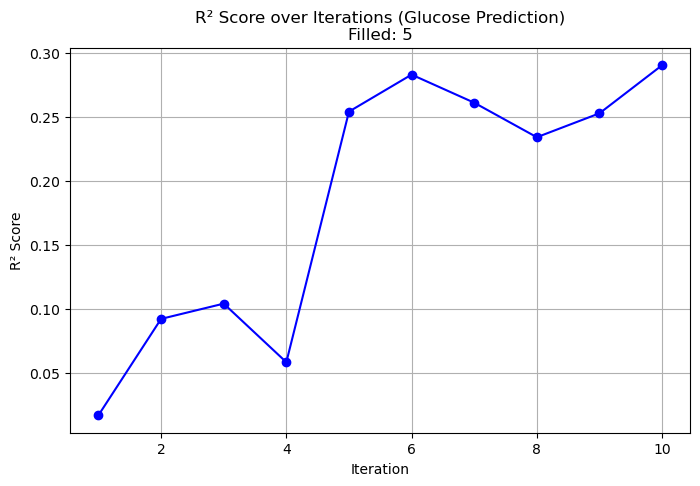

In [31]:
def active_learning_glucose_regression(df, init_size=30, batch_size=20, iterations=10, threshold=0.3):
    df = df.copy()

    cols_with_zero_invalid = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)
    df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())

    X = df.drop(columns=["Glucose"])
    y = df["Glucose"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    INT_LABEL = init_size
    BATCH_SIZE = batch_size

    X_labeled = X_train.iloc[:INT_LABEL]
    y_labeled = y_train.iloc[:INT_LABEL]

    X_unlabeled = X_train.iloc[INT_LABEL:]
    y_unlabeled = y_train.iloc[INT_LABEL:]

    r2_scores = []
    labeled_sizes = []
    difficult_counter = []

    for i in range(iterations):
        model = NGBRegressor(Dist=Normal, verbose=False)
        model.fit(X_labeled, y_labeled)

        preds = model.predict(X_test)
        r2 = r2_score(y_test, preds)
        r2_scores.append(r2)
        labeled_sizes.append(len(X_labeled))

        pred_dists = model.pred_dist(X_unlabeled)
        uncertainty = pred_dists.std()

        difficult_idxs = X_unlabeled[uncertainty > threshold].index.tolist()
        difficult_counter.append(len(difficult_idxs))

        query_idx = np.argsort(uncertainty)[-BATCH_SIZE:]
        query_indices = X_unlabeled.iloc[query_idx].index

        X_new = X_unlabeled.loc[query_indices]
        y_new = y_unlabeled.loc[query_indices]

        X_labeled = pd.concat([X_labeled, X_new])
        y_labeled = pd.concat([y_labeled, y_new])

        X_unlabeled = X_unlabeled.drop(index=query_indices)
        y_unlabeled = y_unlabeled.drop(index=query_indices)

        print(f"Iter {i+1} R2 Score: {round(r2, 3)} - Labeled Size: {len(X_labeled)}")

    final_model = NGBRegressor(Dist=Normal, verbose=False)
    final_model.fit(X_labeled, y_labeled)

    df_missing = df[df["Glucose"] == 0].drop(columns=["Glucose"])
    glucose_preds = final_model.predict(df_missing)

    df.loc[df["Glucose"] == 0, "Glucose_predicted"] = glucose_preds
    df["Glucose_filled"] = df["Glucose"]
    df.loc[df["Glucose"] == 0, "Glucose_filled"] = df["Glucose_predicted"]

    glucose_zero_size = df[df["Glucose"] == 0].shape[0]

    return df, r2_scores, labeled_sizes, difficult_counter, glucose_preds, final_model, glucose_zero_size


df = pd.read_csv("./diabetes.csv") 
df_updated, r2_scores, labeled_sizes, difficult_counter, glucose_preds, model, glucose_zero_size = active_learning_glucose_regression(df)


df_filled_only = df_updated[df["Glucose"] == 0][["Glucose_predicted", "Glucose_filled"]]

print(df_filled_only.head(10))

df_filled_only.to_csv("filled_glucose_predictions.csv", index=True)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(r2_scores)+1), r2_scores, marker='o', color='blue')
plt.title(f"R² Score over Iterations (Glucose Prediction)\nFilled: {glucose_zero_size}")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

C:\Users\Marija\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Top important features for predicting Glucose:
                    Feature  Importance
7                   Outcome    0.297737
5  DiabetesPedigreeFunction    0.196540
3                   Insulin    0.165420
2             SkinThickness    0.146061
6                       Age    0.138237
4                       BMI    0.055995
0               Pregnancies    0.000011
1             BloodPressure    0.000000


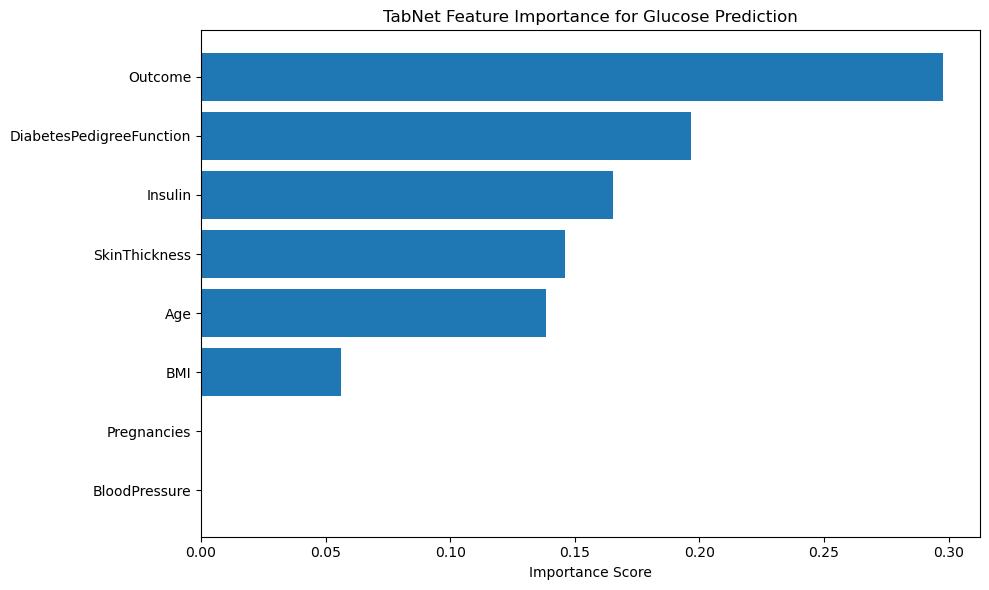

In [33]:
df_copy = df.copy()

cols_with_zero_invalid = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_invalid:
    df_copy[col] = df_copy[col].replace(0, df_copy[col].median())

df_valid = df_copy[df_copy['Glucose'] != 0]

X = df_valid.drop(columns=['Glucose'])
y = df_valid['Glucose']

X_np = X.values
y_np = y.values.reshape(-1, 1)

tabnet_model = TabNetRegressor(verbose=0)
tabnet_model.fit(
    X_train=X_np,
    y_train=y_np,
    max_epochs=100,
    patience=10,
    batch_size=128,
    virtual_batch_size=64
)

feature_importances = tabnet_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top important features for predicting Glucose:")
print(importance_df)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("TabNet Feature Importance for Glucose Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

C:\Users\Marija\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Top important features for predicting Outcome:
                    Feature  Importance
7                       Age    0.268054
6  DiabetesPedigreeFunction    0.195862
0               Pregnancies    0.172971
3             SkinThickness    0.140668
2             BloodPressure    0.088841
1                   Glucose    0.056106
4                   Insulin    0.045102
5                       BMI    0.032397


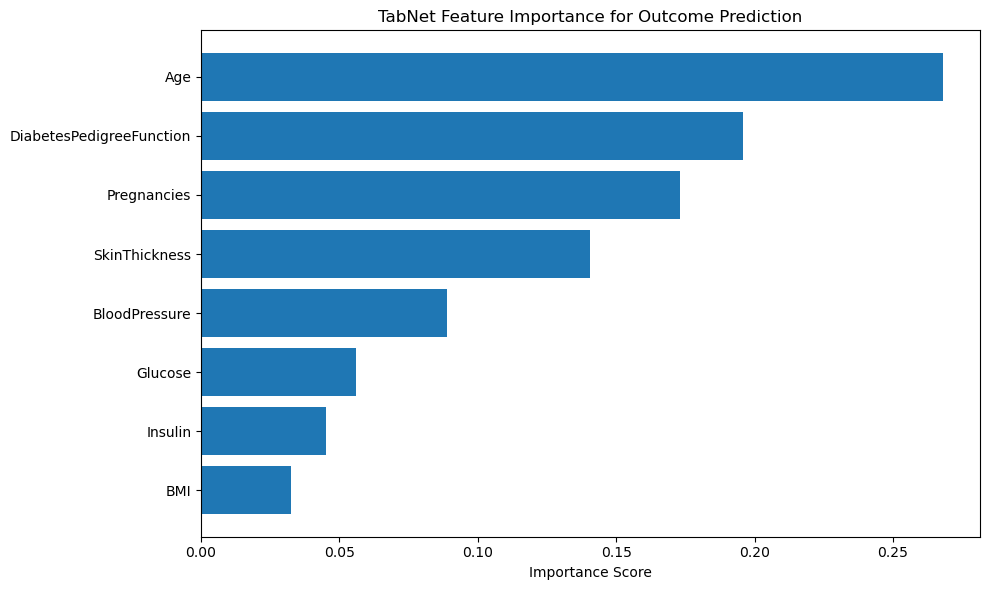

In [35]:
df_copy = df.copy()

cols_with_zero_invalid = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_invalid:
    df_copy[col] = df_copy[col].replace(0, df_copy[col].median())

df_valid = df_copy[df_copy['Outcome'] != 0]

X = df_valid.drop(columns=['Outcome'])
y = df_valid['Outcome']

X_np = X.values
y_np = y.values.reshape(-1, 1)

tabnet_model = TabNetRegressor(verbose=0)
tabnet_model.fit(
    X_train=X_np,
    y_train=y_np,
    max_epochs=100,
    patience=10,
    batch_size=128,
    virtual_batch_size=64
)

feature_importances = tabnet_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top important features for predicting Outcome:")
print(importance_df)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("TabNet Feature Importance for Outcome Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()